<a href="https://colab.research.google.com/github/tarsisos/bootcamp_da/blob/main/data_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#2 Data Modeling Project**

This is the second project from the 4th Data Analytics Bootcamp of [Data Viking](https://www.dataviking.com.br/).

Instructors:
- [Odemir Depieri Jr](https://br.linkedin.com/in/odemir-depieri-jr)
- [Ronisson Lucas](https://br.linkedin.com/in/ronisson-lucas-calmon-da-concei%C3%A7%C3%A3o-7aa884202)

Data description.<br>
The excel base have 3 (three) tabs:

1. Tab: **Tab_Vendas** - Represents the sales made at the store.
2. Tab: **Tab_Vendedor** - Contain the name of the sellers.
3. Tab: **Tab_Produto** - Contain the description of the products.


What you should do:
1. Cross all the data in one tab.
2. Create 3 (three) analyzes with the cross.
3. Export those data to 3 (three) tables of SQLite.




## Importing and reading data

In [ ]:
# Importing libraries

import pandas as pd
import sqlite3

In [ ]:
# Reading and verifying data
tab_sales = pd.read_excel('Dados_Vendas.xlsx', 'Tab_Vendas')
tab_sales.head()

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda
0,1,3,9,2023-04-03,279.9
1,2,3,3,2023-04-20,699.9
2,3,2,6,2023-04-09,399.9
3,4,3,5,2023-04-21,399.9
4,5,3,3,2023-04-28,699.9


In [ ]:
tab_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           100 non-null    int64         
 1   Id_Vendedor  100 non-null    int64         
 2   Id_Produto   100 non-null    int64         
 3   Data_Venda   100 non-null    datetime64[ns]
 4   Venda        100 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.0 KB


In [ ]:
tab_seller = pd.read_excel('Dados_Vendas.xlsx', 'Tab_Vendedor')
tab_seller

,Id_Vendedor,Vendedor
0,1,Marie Curie
1,2,Malala Yousafzai
2,3,Rosa Parks


In [ ]:
tab_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id_Vendedor  3 non-null      int64 
 1   Vendedor     3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [ ]:
tab_product = pd.read_excel('Dados_Vendas.xlsx', 'Tab_Produto')
tab_product

,Id_Produto,Descrição_Produto
0,1,Sandália Preta Couro Salto Alto Tratorada
1,2,Bota Marrom Couro Cano Médio Western Georgia
2,3,Bota Preta Couro Cano Médio Western Georgia
3,4,\nSapatilha Marrom Couro Bico Fino Madison
4,5,\nSapatilha Dourada Couro Bico Fino Fivela
5,6,Sapatilha Preta Couro Bico Fino Fivela
6,7,Sandália Preta Salto Bloco Platino
7,8,Sandália Dourada Salto Bloco Prata Velho
8,9,Sapatilha Preta Couro Bico Quadrado Charlotte
9,10,Papete Dourada Tiras Tramadas


In [ ]:
tab_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id_Produto         10 non-null     int64 
 1   Descrição_Produto  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


## Merging tables

In [ ]:
# 1° merge: tab_sales and tab_seller by id_vendedor
tab_temp = pd.merge(tab_sales, tab_seller, on='Id_Vendedor')

In [ ]:
tab_temp

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda,Vendedor
0,1,3,9,2023-04-03,279.9,Rosa Parks
1,2,3,3,2023-04-20,699.9,Rosa Parks
2,4,3,5,2023-04-21,399.9,Rosa Parks
3,5,3,3,2023-04-28,699.9,Rosa Parks
4,14,3,5,2023-04-13,399.9,Rosa Parks
...,...,...,...,...,...,...
95,92,1,6,2023-04-21,399.9,Marie Curie
96,94,1,10,2023-04-13,339.9,Marie Curie
97,95,1,7,2023-04-28,359.9,Marie Curie
98,98,1,3,2023-04-03,699.9,Marie Curie


In [ ]:
tab_temp.sort_values(by='Id')

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda,Vendedor
0,1,3,9,2023-04-03,279.9,Rosa Parks
1,2,3,3,2023-04-20,699.9,Rosa Parks
30,3,2,6,2023-04-09,399.9,Malala Yousafzai
2,4,3,5,2023-04-21,399.9,Rosa Parks
3,5,3,3,2023-04-28,699.9,Rosa Parks
...,...,...,...,...,...,...
69,96,2,10,2023-04-03,339.9,Malala Yousafzai
29,97,3,2,2023-04-12,699.9,Rosa Parks
98,98,1,3,2023-04-03,699.9,Marie Curie
99,99,1,9,2023-04-26,279.9,Marie Curie


In [ ]:
tab_temp.sort_values(by='Id').head()

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda,Vendedor
0,1,3,9,2023-04-03,279.9,Rosa Parks
1,2,3,3,2023-04-20,699.9,Rosa Parks
30,3,2,6,2023-04-09,399.9,Malala Yousafzai
2,4,3,5,2023-04-21,399.9,Rosa Parks
3,5,3,3,2023-04-28,699.9,Rosa Parks


In [ ]:
# 2° merge: tab_temp and tab_product by id_produto
tab_final = pd.merge(tab_temp, tab_product, on='Id_Produto')

In [ ]:
tab_final.sort_values(by="Id").head(10)

,Id,Id_Vendedor,Id_Produto,Data_Venda,Venda,Vendedor,Descrição_Produto
0,1,3,9,2023-04-03,279.9,Rosa Parks,Sapatilha Preta Couro Bico Quadrado Charlotte
9,2,3,3,2023-04-20,699.9,Rosa Parks,Bota Preta Couro Cano Médio Western Georgia
36,3,2,6,2023-04-09,399.9,Malala Yousafzai,Sapatilha Preta Couro Bico Fino Fivela
18,4,3,5,2023-04-21,399.9,Rosa Parks,\nSapatilha Dourada Couro Bico Fino Fivela
10,5,3,3,2023-04-28,699.9,Rosa Parks,Bota Preta Couro Cano Médio Western Georgia
88,6,1,7,2023-04-20,359.9,Marie Curie,Sandália Preta Salto Bloco Platino
95,7,2,8,2023-04-11,359.9,Malala Yousafzai,Sandália Dourada Salto Bloco Prata Velho
3,8,2,9,2023-04-01,279.9,Malala Yousafzai,Sapatilha Preta Couro Bico Quadrado Charlotte
11,9,2,3,2023-04-27,699.9,Malala Yousafzai,Bota Preta Couro Cano Médio Western Georgia
22,10,2,5,2023-04-02,399.9,Malala Yousafzai,\nSapatilha Dourada Couro Bico Fino Fivela


In [ ]:
tab_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 100 non-null    int64         
 1   Id_Vendedor        100 non-null    int64         
 2   Id_Produto         100 non-null    int64         
 3   Data_Venda         100 non-null    datetime64[ns]
 4   Venda              100 non-null    float64       
 5   Vendedor           100 non-null    object        
 6   Descrição_Produto  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 6.2+ KB


In [ ]:
tab_final["Descrição_Produto"].value_counts()

Papete Dourada Tiras Tramadas                    18
\nSapatilha Dourada Couro Bico Fino Fivela       13
Sapatilha Preta Couro Bico Fino Fivela           13
Sandália Preta Salto Bloco Platino               11
Sapatilha Preta Couro Bico Quadrado Charlotte     9
Bota Preta Couro Cano Médio Western Georgia       9
Sandália Dourada Salto Bloco Prata Velho          8
Sandália Preta Couro Salto Alto Tratorada         7
Bota Marrom Couro Cano Médio Western Georgia      6
\nSapatilha Marrom Couro Bico Fino Madison        6
Name: Descrição_Produto, dtype: int64

In [ ]:
# Removing "\" from two products name
tab_final['Descrição_Produto'].replace('\nSapatilha Dourada Couro Bico Fino Fivela','Sapatilha Dourada Couro Bico Fino Fivela', inplace=True)
tab_final['Descrição_Produto'].replace('\nSapatilha Marrom Couro Bico Fino Madison','Sapatilha Marrom Couro Bico Fino Madison', inplace=True)

In [ ]:
tab_final['Descrição_Produto'].value_counts()

Papete Dourada Tiras Tramadas                    18
Sapatilha Dourada Couro Bico Fino Fivela         13
Sapatilha Preta Couro Bico Fino Fivela           13
Sandália Preta Salto Bloco Platino               11
Sapatilha Preta Couro Bico Quadrado Charlotte     9
Bota Preta Couro Cano Médio Western Georgia       9
Sandália Dourada Salto Bloco Prata Velho          8
Sandália Preta Couro Salto Alto Tratorada         7
Bota Marrom Couro Cano Médio Western Georgia      6
Sapatilha Marrom Couro Bico Fino Madison          6
Name: Descrição_Produto, dtype: int64

## Data analysis

### *1º Analyze the sales of the sellers, like the example below.*

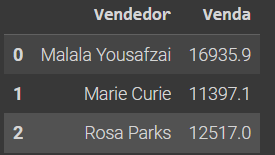

In [ ]:
tab_final.groupby(by='Vendedor')['Venda'].sum()

Vendedor
Malala Yousafzai    16935.9
Marie Curie         11397.1
Rosa Parks          12517.0
Name: Venda, dtype: float64

In [ ]:
Seller_Analysis = tab_final.groupby(by='Vendedor')['Venda'].sum().reset_index()

In [ ]:
Seller_Analysis

,Vendedor,Venda
0,Malala Yousafzai,16935.9
1,Marie Curie,11397.1
2,Rosa Parks,12517.0


### *2º Analyze the products sold, like the example below.*

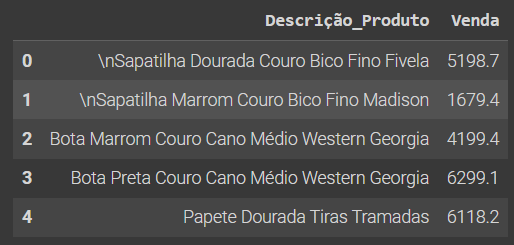

In [ ]:
tab_final.groupby(by='Descrição_Produto')['Venda'].sum()

Descrição_Produto
Bota Marrom Couro Cano Médio Western Georgia     4199.4
Bota Preta Couro Cano Médio Western Georgia      6299.1
Papete Dourada Tiras Tramadas                    6118.2
Sandália Dourada Salto Bloco Prata Velho         2879.2
Sandália Preta Couro Salto Alto Tratorada        2799.3
Sandália Preta Salto Bloco Platino               3958.9
Sapatilha Dourada Couro Bico Fino Fivela         5198.7
Sapatilha Marrom Couro Bico Fino Madison         1679.4
Sapatilha Preta Couro Bico Fino Fivela           5198.7
Sapatilha Preta Couro Bico Quadrado Charlotte    2519.1
Name: Venda, dtype: float64

In [ ]:
Product_Analysis = tab_final.groupby(by='Descrição_Produto')['Venda'].sum().reset_index()

In [ ]:
Product_Analysis

,Descrição_Produto,Venda
0,Bota Marrom Couro Cano Médio Western Georgia,4199.4
1,Bota Preta Couro Cano Médio Western Georgia,6299.1
2,Papete Dourada Tiras Tramadas,6118.2
3,Sandália Dourada Salto Bloco Prata Velho,2879.2
4,Sandália Preta Couro Salto Alto Tratorada,2799.3
5,Sandália Preta Salto Bloco Platino,3958.9
6,Sapatilha Dourada Couro Bico Fino Fivela,5198.7
7,Sapatilha Marrom Couro Bico Fino Madison,1679.4
8,Sapatilha Preta Couro Bico Fino Fivela,5198.7
9,Sapatilha Preta Couro Bico Quadrado Charlotte,2519.1


### *3º Analyze the daily sales of the store, like the example below.*
*tip: to generate the day of the week use the 'pd.Grouper' function, but feel free to do it another way.*

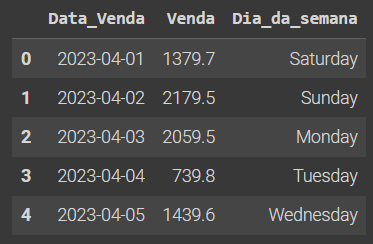

In [ ]:
tab_final.groupby(pd.Grouper(key='Data_Venda', freq='D'))['Venda'].sum().reset_index().head(10)

,Data_Venda,Venda
0,2023-04-01,1379.7
1,2023-04-02,2179.5
2,2023-04-03,2059.5
3,2023-04-04,739.8
4,2023-04-05,1439.6
5,2023-04-06,1779.6
6,2023-04-07,1019.7
7,2023-04-08,279.9
8,2023-04-09,1459.6
9,2023-04-10,0.0


In [ ]:
Sales_Analysis = tab_final.groupby(pd.Grouper(key='Data_Venda', freq='D'))['Venda'].sum().reset_index()

In [ ]:
Sales_Analysis.head(10)

,Data_Venda,Venda
0,2023-04-01,1379.7
1,2023-04-02,2179.5
2,2023-04-03,2059.5
3,2023-04-04,739.8
4,2023-04-05,1439.6
5,2023-04-06,1779.6
6,2023-04-07,1019.7
7,2023-04-08,279.9
8,2023-04-09,1459.6
9,2023-04-10,0.0


In [ ]:
Sales_Analysis['Dia_da_semana'] = Sales_Analysis['Data_Venda'].dt.strftime('%A')
Sales_Analysis.head()

,Data_Venda,Venda,Dia_da_semana
0,2023-04-01,1379.7,Saturday
1,2023-04-02,2179.5,Sunday
2,2023-04-03,2059.5,Monday
3,2023-04-04,739.8,Tuesday
4,2023-04-05,1439.6,Wednesday


## Creating Database

In [ ]:
# Create database
db_name = 'data_sales.db'
conn = sqlite3.connect(db_name)
cursor = conn.cursor()

In [ ]:
cursor.execute("Select name from sqlite_master where type='table'; ")

tabelas = cursor.fetchall()

for tabela in tabelas:
  print(tabela[0])

tab_sales
tab_seller
tab_product


In [ ]:
# Insert sales analysis on database
Sales_Analysis.to_sql(
    name = 'tab_sales',
    index= False,
    if_exists = 'append',
    con = conn
)

29

In [ ]:
pd.read_sql(" select * from tab_sales", conn).head(10)

,Data_Venda,Venda,Dia_da_semana
0,2023-04-01 00:00:00,1379.7,Saturday
1,2023-04-02 00:00:00,2179.5,Sunday
2,2023-04-03 00:00:00,2059.5,Monday
3,2023-04-04 00:00:00,739.8,Tuesday
4,2023-04-05 00:00:00,1439.6,Wednesday
5,2023-04-06 00:00:00,1779.6,Thursday
6,2023-04-07 00:00:00,1019.7,Friday
7,2023-04-08 00:00:00,279.9,Saturday
8,2023-04-09 00:00:00,1459.6,Sunday
9,2023-04-10 00:00:00,0.0,Monday


In [ ]:
# Insert seller analysis on database
Seller_Analysis.to_sql(
    name='tab_seller',
    index=False,
    if_exists = 'append',
    con= conn
)

3

In [ ]:
pd.read_sql(" select * from tab_seller ", conn)

,Vendedor,Venda
0,Malala Yousafzai,16935.9
1,Marie Curie,11397.1
2,Rosa Parks,12517.0
3,Malala Yousafzai,16935.9
4,Marie Curie,11397.1
5,Rosa Parks,12517.0


In [ ]:
Seller_Analysis

,Vendedor,Venda
0,Malala Yousafzai,16935.9
1,Marie Curie,11397.1
2,Rosa Parks,12517.0


In [ ]:
# Insert product analysis on database
Product_Analysis.to_sql(
    name = 'tab_product',
    index = False,
    if_exists = 'append',
    con = conn
)

10

In [ ]:
pd.read_sql('select * from tab_product', conn)

,Descrição_Produto,Venda
0,Bota Marrom Couro Cano Médio Western Georgia,4199.4
1,Bota Preta Couro Cano Médio Western Georgia,6299.1
2,Papete Dourada Tiras Tramadas,6118.2
3,Sandália Dourada Salto Bloco Prata Velho,2879.2
4,Sandália Preta Couro Salto Alto Tratorada,2799.3
5,Sandália Preta Salto Bloco Platino,3958.9
6,Sapatilha Dourada Couro Bico Fino Fivela,5198.7
7,Sapatilha Marrom Couro Bico Fino Madison,1679.4
8,Sapatilha Preta Couro Bico Fino Fivela,5198.7
9,Sapatilha Preta Couro Bico Quadrado Charlotte,2519.1


### Another way to get data from database

In [ ]:
# Create a query
query = """
SELECT * FROM tab_seller
"""

# Execute the query
tb_query = pd.read_sql_query(query, conn)
display(tb_query)

,Vendedor,Venda
0,Malala Yousafzai,16935.9
1,Marie Curie,11397.1
2,Rosa Parks,12517.0
3,Malala Yousafzai,16935.9
4,Marie Curie,11397.1
5,Rosa Parks,12517.0


In [ ]:
query = """
SELECT * From tab_sales
"""

tb_query = pd.read_sql_query(query, conn).head()
display(tb_query)

,Data_Venda,Venda,Dia_da_semana
0,2023-04-01 00:00:00,1379.7,Saturday
1,2023-04-02 00:00:00,2179.5,Sunday
2,2023-04-03 00:00:00,2059.5,Monday
3,2023-04-04 00:00:00,739.8,Tuesday
4,2023-04-05 00:00:00,1439.6,Wednesday


In [ ]:
query = """
SELECT Dia_da_semana, Venda
From tab_sales
GROUP BY Dia_da_semana
ORDER BY Venda DESC
"""

tb_query = pd.read_sql_query(query, conn)
display(tb_query)

,Dia_da_semana,Venda
0,Sunday,2179.5
1,Monday,2059.5
2,Thursday,1779.6
3,Wednesday,1439.6
4,Saturday,1379.7
5,Friday,1019.7
6,Tuesday,739.8


In [ ]:
query = """
SELECT * FROM tab_product
"""

tb_query = pd.read_sql_query(query, conn).head()
display(tb_query)

,Descrição_Produto,Venda
0,Bota Marrom Couro Cano Médio Western Georgia,4199.4
1,Bota Preta Couro Cano Médio Western Georgia,6299.1
2,Papete Dourada Tiras Tramadas,6118.2
3,Sandália Dourada Salto Bloco Prata Velho,2879.2
4,Sandália Preta Couro Salto Alto Tratorada,2799.3


In [ ]:
query = """
SELECT Descrição_Produto as Produto, sum(venda) AS Total_Vendido
FROM tab_product
GROUP BY Descrição_Produto
ORDER BY Total_Vendido DESC
"""

tb_query = pd.read_sql_query(query, conn)
display(tb_query)

,Produto,Total_Vendido
0,Bota Preta Couro Cano Médio Western Georgia,12598.2
1,Papete Dourada Tiras Tramadas,12236.4
2,Sapatilha Preta Couro Bico Fino Fivela,10397.4
3,Sapatilha Dourada Couro Bico Fino Fivela,10397.4
4,Bota Marrom Couro Cano Médio Western Georgia,8398.8
5,Sandália Preta Salto Bloco Platino,7917.8
6,Sandália Dourada Salto Bloco Prata Velho,5758.4
7,Sandália Preta Couro Salto Alto Tratorada,5598.6
8,Sapatilha Preta Couro Bico Quadrado Charlotte,5038.2
9,Sapatilha Marrom Couro Bico Fino Madison,3358.8
